In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('E:\Excelr-P269-Internship-Project-Group2-OIl-Price-Prediction-And-Forecasting-Using-Python\oil_prices_yahoo1.csv')

In [6]:
data.head()

,Date,Close
0,2000-08-23,32.049999
1,2000-08-24,31.629999
2,2000-08-25,32.049999
3,2000-08-28,32.869999
4,2000-08-29,32.720001


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5751 entries, 0 to 5750
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5751 non-null   object 
 1   Close   5751 non-null   float64
dtypes: float64(1), object(1)
memory usage: 90.0+ KB


In [8]:
data.shape

(5751, 2)

In [9]:
data.isnull().sum()

Date     0
Close    0
dtype: int64

In [10]:
from datetime import datetime
import calendar
import seaborn as sns
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
df=pd.DataFrame(data)
df.rename(columns = {'Close':'Price'}, inplace = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5751 entries, 0 to 5750
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5751 non-null   datetime64[ns]
 1   Price   5751 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 90.0 KB


In [12]:
data.head()

,Date,Price
0,2000-08-23,32.049999
1,2000-08-24,31.629999
2,2000-08-25,32.049999
3,2000-08-28,32.869999
4,2000-08-29,32.720001


In [13]:
# Load your data into a DataFrame
df = pd.DataFrame(data)

In [14]:
import plotly.express as px
# Create the interactive time series map
fig = px.line(df, x='Date', y='Price', title='Time Series Map')

# Show the plot
fig.show()


In [15]:
# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by month and calculate the mean price for each month
monthly_data = df.groupby(pd.Grouper(key='Date', freq='M')).mean().reset_index()

# Create the interactive bar chart
fig = px.bar(monthly_data, x='Date', y='Price', title='Monthly Bar Chart')

# Show the plot
fig.show()


In [16]:
# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by month and calculate the mean price for each month
monthly_data = df.groupby(pd.Grouper(key='Date', freq='M')).min().reset_index()

# Create the interactive bar chart
fig = px.bar(monthly_data, x='Date', y='Price', title='Monthly Bar Chart')

# Show the plot
fig.show()

In [17]:
# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by month and calculate the mean price for each month
monthly_data = df.groupby(pd.Grouper(key='Date', freq='M')).max().reset_index()

# Create the interactive bar chart
fig = px.bar(monthly_data, x='Date', y='Price', title='Monthly Bar Chart')

# Show the plot
fig.show()

In [18]:
# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by year and calculate the mean price for each year
yearly_data = df.groupby(pd.Grouper(key='Date', freq='Y')).mean().reset_index()

# Create the interactive bar chart
fig = px.bar(yearly_data, x='Date', y='Price', title='Yearly Bar Chart')

# Show the plot
fig.show()


In [19]:
# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Pivot the data to create a matrix with dates as rows and columns as years
heatmap_data = df.pivot_table(index=df['Date'].dt.month, columns=df['Date'].dt.year, values='Price', aggfunc='mean')

# Create the interactive heatmap
fig = px.imshow(heatmap_data, title='Heatmap')

# Show the plot
fig.show()


In [20]:
# Pivot the data to create a matrix with dates as rows and columns as years
heatmap_data = df.pivot_table(index=df['Date'].dt.month, columns=df['Date'].dt.year, values='Price', aggfunc='mean')

# Find the minimum and maximum values in the heatmap data
min_value = heatmap_data.min().min()
max_value = heatmap_data.max().max()

print(f"The minimum value in the heatmap is: {min_value}")
print(f"The maximum value in the heatmap is: {max_value}")


The minimum value in the heatmap is: 16.699047678992862
The maximum value in the heatmap is: 134.01571437290735


In [21]:
# Pivot the data to create a matrix with dates as rows and columns as years
heatmap_data = df.pivot_table(index=df['Date'].dt.month, columns=df['Date'].dt.year, values='Price', aggfunc='mean')

# Find the minimum value and its corresponding date in the heatmap data
min_value = heatmap_data.min().min()
min_date = heatmap_data.stack().idxmin()

# Find the maximum value and its corresponding date in the heatmap data
max_value = heatmap_data.max().max()
max_date = heatmap_data.stack().idxmax()

print(f"The minimum value in the heatmap is: {min_value} and it occurred on: {min_date}")
print(f"The maximum value in the heatmap is: {max_value} and it occurred on: {max_date}")


The minimum value in the heatmap is: 16.699047678992862 and it occurred on: (4, 2020)
The maximum value in the heatmap is: 134.01571437290735 and it occurred on: (6, 2008)


In [22]:
# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Pivot the data to create a matrix with years as rows and months as columns
heatmap_data = df.pivot_table(index=df['Date'].dt.year, columns=df['Date'].dt.month, values='Price', aggfunc='mean')

# Create the interactive heatmap
fig = px.imshow(heatmap_data, title='Yearly Heatmap')

# Show the plot
fig.show()


In [23]:
# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Pivot the data to create a matrix with months as rows and days as columns
heatmap_data = df.pivot_table(index=df['Date'].dt.month, columns=df['Date'].dt.day, values='Price', aggfunc='mean')

# Create the interactive heatmap
fig = px.imshow(heatmap_data, title='Monthly Heatmap')

# Show the plot
fig.show()


In [24]:
# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Create the interactive boxplot
fig = px.box(df, x='Date', y='Price', title='Boxplot')
fig.show()

# Create the interactive scatterplot
fig = px.scatter(df, x='Date', y='Price', title='Scatterplot')
fig.show()


In [25]:
# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Create the interactive boxplot
fig = px.box(df, x='Date', y='Price', title='Boxplot')

# Show the plot
fig.show()


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

(<Figure size 1250x4080 with 25 Axes>,
 array([<Axes: ylabel='2000'>, <Axes: ylabel='2001'>,
        <Axes: ylabel='2002'>, <Axes: ylabel='2003'>,
        <Axes: ylabel='2004'>, <Axes: ylabel='2005'>,
        <Axes: ylabel='2006'>, <Axes: ylabel='2007'>,
        <Axes: ylabel='2008'>, <Axes: ylabel='2009'>,
        <Axes: ylabel='2010'>, <Axes: ylabel='2011'>,
        <Axes: ylabel='2012'>, <Axes: ylabel='2013'>,
        <Axes: ylabel='2014'>, <Axes: ylabel='2015'>,
        <Axes: ylabel='2016'>, <Axes: ylabel='2017'>,
        <Axes: ylabel='2018'>, <Axes: ylabel='2019'>,
        <Axes: ylabel='2020'>, <Axes: ylabel='2021'>,
        <Axes: ylabel='2022'>, <Axes: ylabel='2023'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

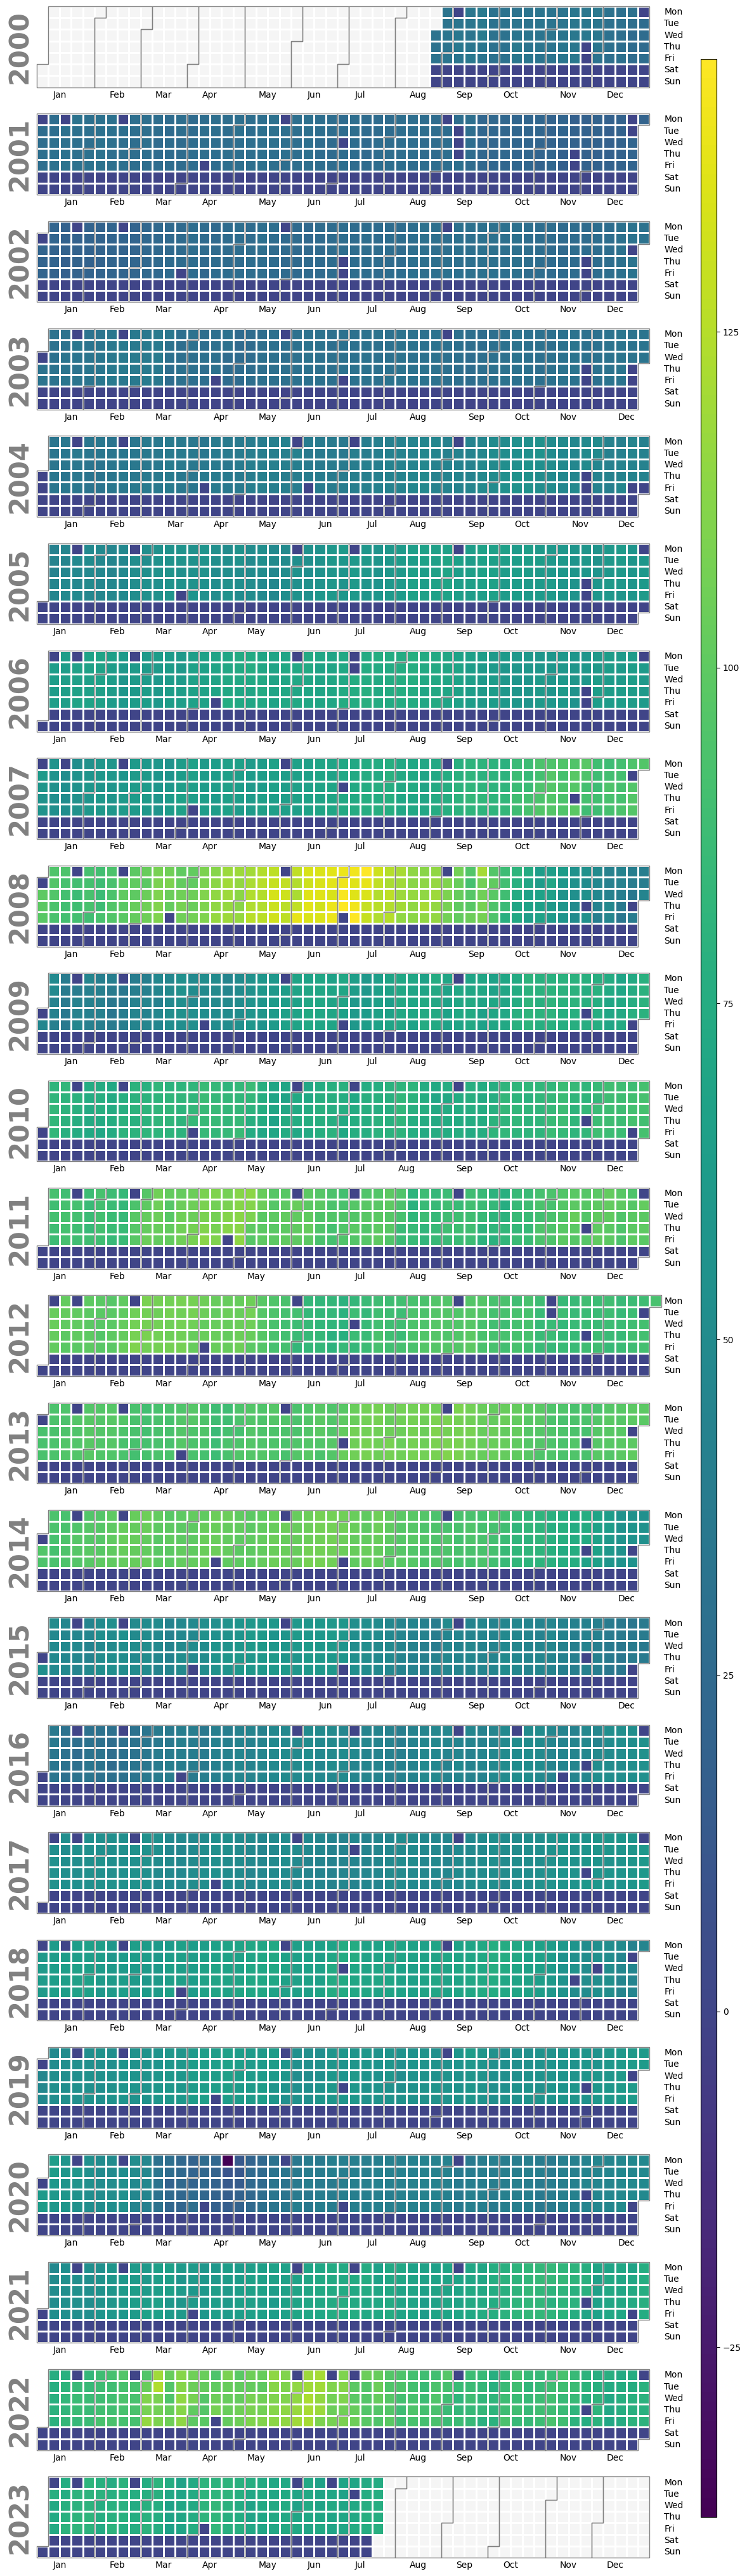

In [26]:
import calplot
# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Create a Series with the Date as the index and the Price as the values
data = pd.Series(df['Price'].values, index=df['Date'])

# Create the interactive calendar heatmap
calplot.calplot(data)


In [27]:
import seaborn as sns

In [28]:
import ptitprince as pt
import seaborn as sns
import pandas as pd
# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Set the style and color palette
sns.set(style="white", palette="muted")

# Create the raincloud plot
ax = pt.RainCloud(x='Date', y='Price', data=df, width_viol=.6)

# Show the plot
sns.despine(left=True)


C:\Users\nazee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ptitprince\PtitPrince.py:61: FutureWarning:

In the future `np.bool` will be defined as the corresponding NumPy scalar.



AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
import pandas as pd

# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Convert the Date column to a numerical representation (e.g., number of days since 1970-01-01)
df['Date'] = (df['Date'] - pd.Timestamp('1970-01-01')) / pd.Timedelta('1D')

# Perform the desired mathematical operation
result = df['Date'] / df['Price']


NameError: name 'df' is not defined

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

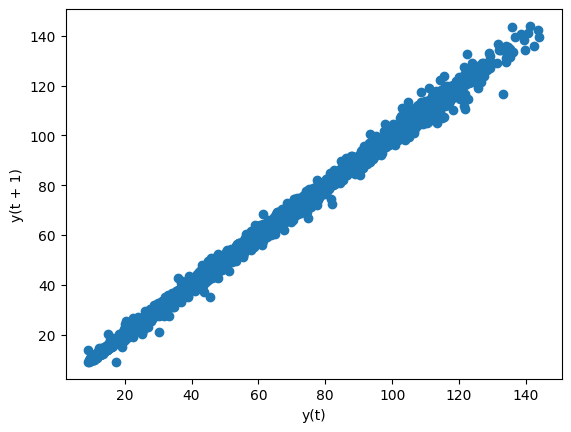

In [ ]:
import pandas as pd
from pandas.plotting import lag_plot
# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Set the Date column as the index
df.set_index('Date', inplace=True)

# Create the lag plot
lag_plot(df['Price'])


In [ ]:
import plotly.graph_objs as go
import pandas as pd
from scipy.signal import periodogram

# Calculate the periodogram
f, Pxx = periodogram(df['Price'])

# Create the interactive spectral density plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=f, y=Pxx))
fig.update_layout(title='Spectral Density Plot', xaxis_title='Frequency', yaxis_title='Power')
fig.show()


In [ ]:
df=pd.DataFrame(data)

In [ ]:
# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month and year from the Date column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Create the interactive seasonal subseries plot
fig = px.line(df, x='Month', y='Price', color='Year', title='Seasonal Subseries Plot')

# Show the plot
fig.show()


<Axes: xlabel='Date', ylabel='Price'>

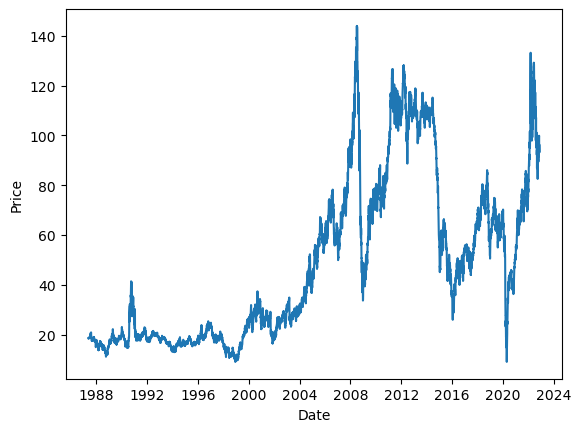

In [ ]:
sns.lineplot(x = "Date", y = "Price",
             data = data)

In [ ]:
data1=data.set_index("Date",drop=True)

In [ ]:
data

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2022-11-08,96.85
2022-11-09,93.05
2022-11-10,94.25


<Axes: xlabel='Date'>

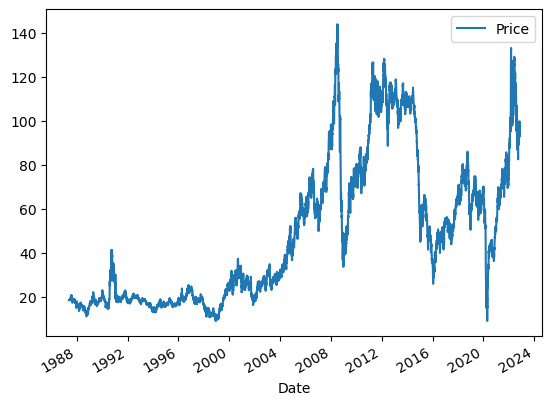

In [ ]:
data1.plot()

# Time Resampling 

In [ ]:
#"RULE A Which Means Year and Frequency"
data1.resample(rule='A').min()

,Price
Date,
1987-12-31,15.03
1988-12-31,11.20
1989-12-31,16.05
1990-12-31,14.68
1991-12-31,17.60
1992-12-31,17.05
1993-12-31,13.13
1994-12-31,13.00
1995-12-31,15.35


<Axes: xlabel='Date'>

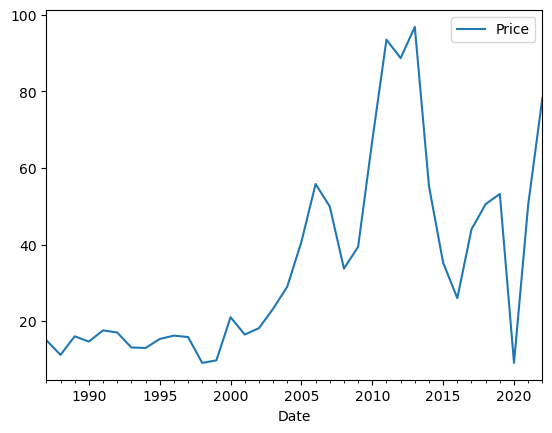

In [ ]:
data1.resample(rule='A').min().plot()

In [ ]:
data1.resample(rule='A').max()

,Price
Date,
1987-12-31,20.95
1988-12-31,17.95
1989-12-31,22.25
1990-12-31,41.45
1991-12-31,30.28
1992-12-31,21.55
1993-12-31,19.60
1994-12-31,19.03
1995-12-31,19.38


<Axes: xlabel='Date'>

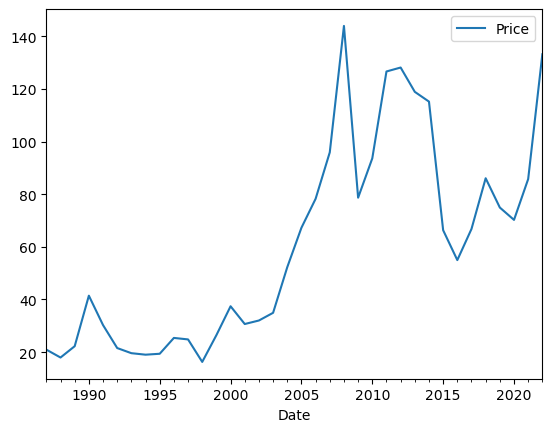

In [ ]:
data1.resample(rule='A').max().plot()

[Text(0.5, 0, 'Yearly_Max_Price'), Text(0, 0.5, 'Price')]

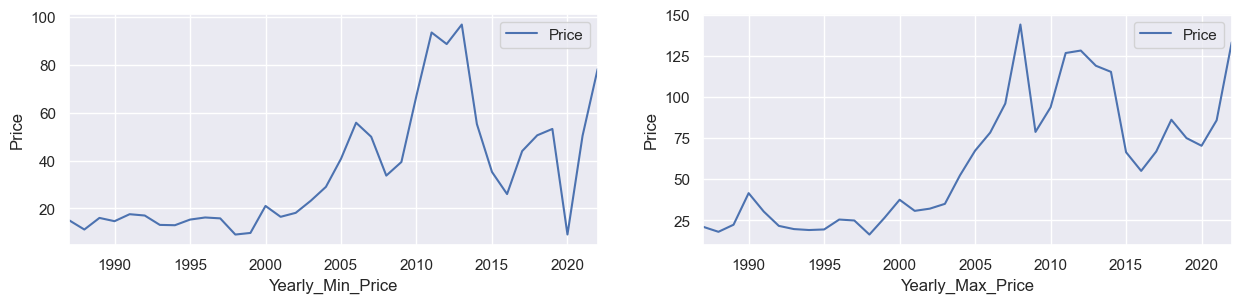

In [ ]:
fig = plt.figure()
sns.set(rc={'figure.figsize':(15,3)})
ax1 = fig.add_subplot(1,2,1) 
ax2 = fig.add_subplot(1,2,2)
data1.resample(rule='A').min().plot(ax=ax1).set(xlabel='Yearly_Min_Price', ylabel='Price')
data1.resample(rule='A').max().plot(ax=ax2).set(xlabel='Yearly_Max_Price', ylabel='Price')


[Text(0.5, 0, 'Yearly_Mean_Price'), Text(0, 0.5, 'Price')]

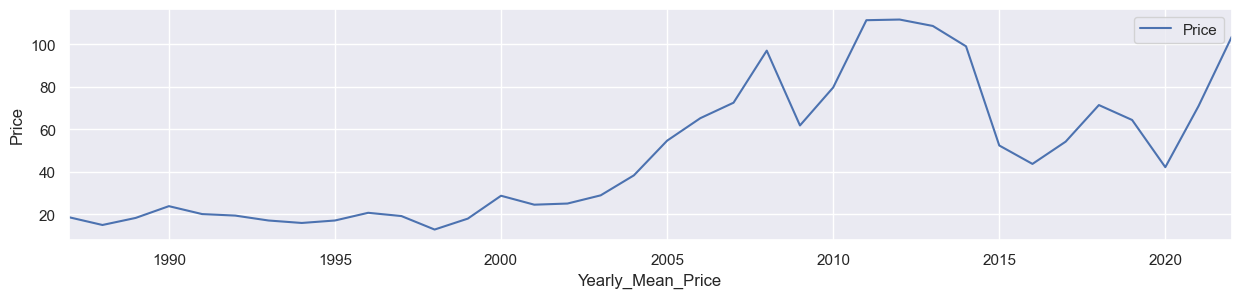

In [ ]:
data1.resample(rule='A').mean().plot().set(xlabel='Yearly_Mean_Price', ylabel='Price')

In [ ]:
#"RULE QS Which Means Quaterly and Frequency"

[Text(0.5, 0, 'Quaterly_Max_Price'), Text(0, 0.5, 'Price')]

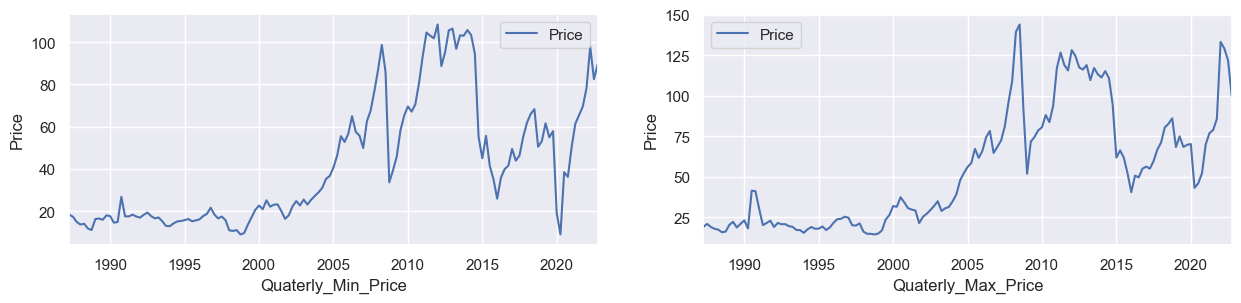

In [ ]:
fig = plt.figure()
sns.set(rc={'figure.figsize':(15,3)})
ax1 = fig.add_subplot(1,2,1) 
ax2 = fig.add_subplot(1,2,2)
data1.resample(rule='QS').min().plot(ax=ax1).set(xlabel='Quaterly_Min_Price', ylabel='Price')
data1.resample(rule='QS').max().plot(ax=ax2).set(xlabel='Quaterly_Max_Price', ylabel='Price')

[Text(0.5, 0, 'Yearly_Max_Price'), Text(0, 0.5, 'Price')]

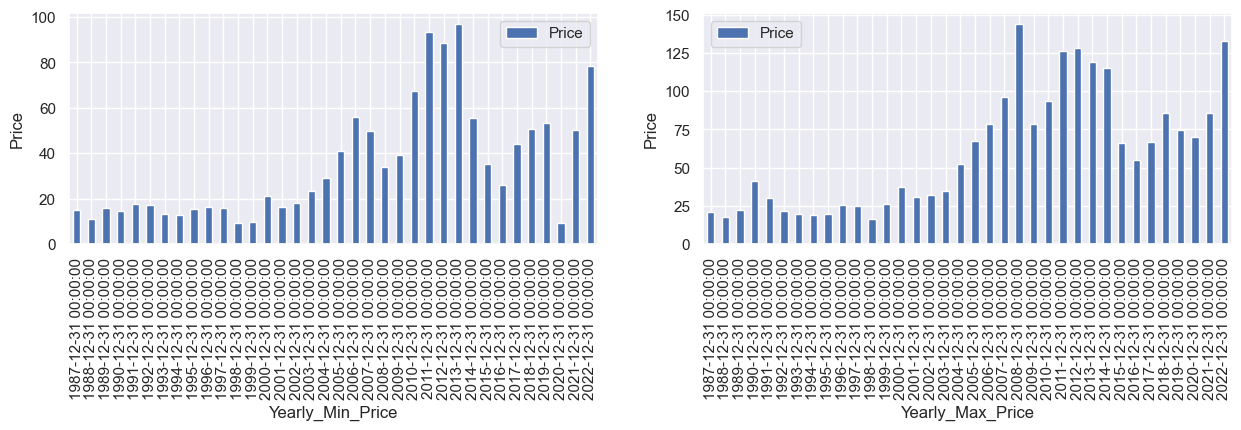

In [ ]:
fig = plt.figure()
sns.set(rc={'figure.figsize':(15,3)})
ax1 = fig.add_subplot(1,2,1) 
ax2 = fig.add_subplot(1,2,2)
data1.resample(rule='A').min().plot(kind='bar',ax=ax1).set(xlabel='Yearly_Min_Price', ylabel='Price')
data1.resample(rule='A').max().plot(kind='bar',ax=ax2).set(xlabel='Yearly_Max_Price', ylabel='Price')

# Rolling

In [ ]:
data1.rolling(15).mean().head(30)

,Price
Date,
1987-05-20,NaN
1987-05-21,NaN
1987-05-22,NaN
1987-05-25,NaN
1987-05-26,NaN
1987-05-27,NaN
1987-05-28,NaN
1987-05-29,NaN
1987-06-01,NaN


In [ ]:
data1['price_150 days rolling']=data1['Price'].rolling(150).mean()

<Axes: xlabel='Date'>

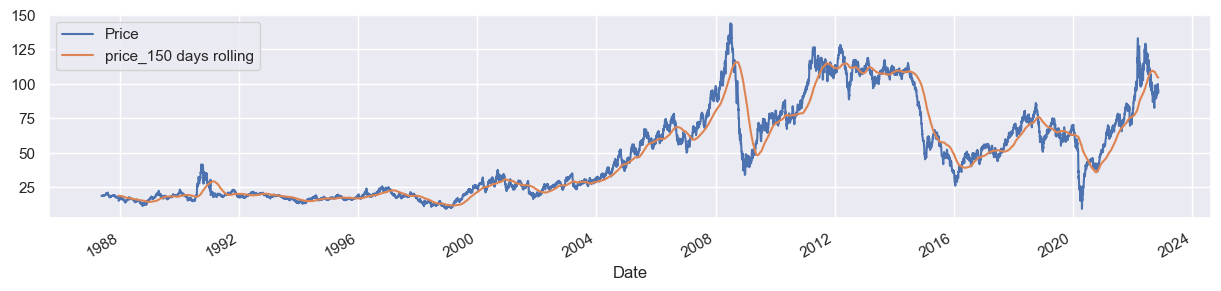

In [ ]:
data1[['Price','price_150 days rolling']].plot()

In [ ]:
#By applying rolling we can get some information about smoothing
